# Employee Productivity and Satisfaction HR Data

## About Dataset

This dataset was created to explore the diverse factors impacting employee performance and satisfaction in a typical organization. It spans a variety of fields from personal demographics to performance metrics and job details, offering a comprehensive view into the dynamics of the workplace.

The inspiration behind the creation of this dataset is to provide an accessible resource for those interested in the field of HR analytics. It can be used to derive insights into employee performance, satisfaction, and overall engagement at work. This dataset is particularly useful for tasks such as predicting employee turnover, analyzing employee performance, and understanding the factors that influence job satisfaction.

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
hr_df = pd.read_csv("hr_dashboard_data.csv")
hr_df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


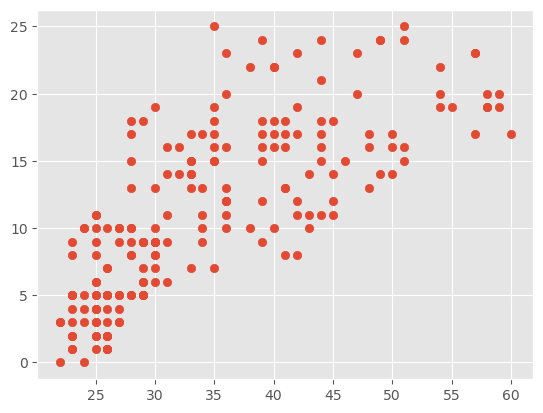

In [7]:
plt.scatter(hr_df["Age"], hr_df["Projects Completed"])

In [8]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(hr_df[["Age", "Projects Completed"]])# compute clusters from the means of age and proj completed
y_predicted

C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0])

In [10]:
hr_df["cluster"]= y_predicted# append the predicted to the dataframe
hr_df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,cluster
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,1
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540,2
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,1
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303,1
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051,1
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612,1
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992,1
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216,0


# Separate dataframes from one cluster 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


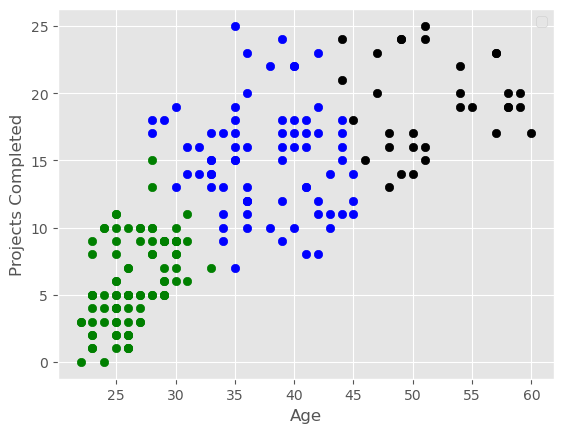

In [11]:
df1 = hr_df[hr_df.cluster == 0]
df2 = hr_df[hr_df.cluster == 1]#three different dataframes
df3 = hr_df[hr_df.cluster == 2]

plt.scatter(df1.Age, df1['Projects Completed'], color = "blue")
plt.scatter(df2.Age, df2['Projects Completed'], color = "green")#plot them with different colors
plt.scatter(df3.Age, df3['Projects Completed'], color = "black")

plt.xlabel("Age")
plt.ylabel("Projects Completed")
plt.legend()

# Create scaler

In [20]:
scaler = MinMaxScaler() #Transform features by scaling each feature to a given range
scaler.fit(hr_df[["Projects Completed"]])
hr_df[["Projects Completed"]] = scaler.transform(hr_df[["Projects Completed"]])
hr_df

scaler.fit(hr_df[["Age"]])
hr_df[["Age"]] = scaler.transform(hr_df[["Age"]])

In [13]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(hr_df[["Age", "Projects Completed"]])
y_predicted

C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0])

In [14]:
hr_df["cluster"] = y_predicted
hr_df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,cluster
0,Douglas Lindsey,0.078947,Male,0.44,57,25,4.7,Marketing,Analyst,Jan-20,63596,1
1,Anthony Roberson,0.973684,Female,0.76,55,76,2.8,IT,Manager,Jan-99,112540,2
2,Thomas Miller,0.210526,Male,0.32,87,10,2.4,IT,Analyst,Jan-17,66292,1
3,Joshua Lewis,0.105263,Female,0.04,53,4,1.4,Marketing,Intern,Jan-22,38303,1
4,Stephanie Bailey,0.552632,Male,0.56,3,9,4.5,IT,Team Lead,Jan-05,101133,0


In [15]:
km.cluster_centers_

array([[0.38909774, 0.57885714],
       [0.11683054, 0.22857143],
       [0.73616734, 0.7774359 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


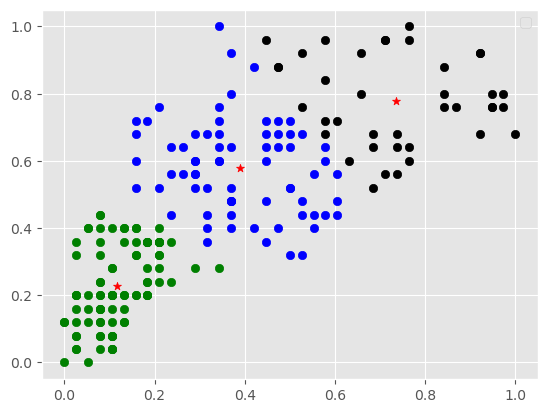

In [16]:
#separate dataframes from one cluster
df1 = hr_df[hr_df.cluster == 0]
df2 = hr_df[hr_df.cluster == 1]#three different dataframes
df3 = hr_df[hr_df.cluster == 2]

plt.scatter(df1.Age, df1['Projects Completed'], color = "blue")
plt.scatter(df2.Age, df2['Projects Completed'], color = "green")#plot them with different colors
plt.scatter(df3.Age, df3['Projects Completed'], color = "black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "red", marker = "*")
plt.legend()

# Elbow plot method

In [17]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(hr_df[['Age', 'Projects Completed']])
    sse.append(km.inertia_)# get sum of square error

C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [18]:
sse

[26.305937595567855,
 9.385201153910405,
 5.702094463283714,
 4.483021566029761,
 3.3413109617355476,
 2.5752918229011357,
 2.1087033373753794,
 1.8232368846496894,
 1.5761863234225673]

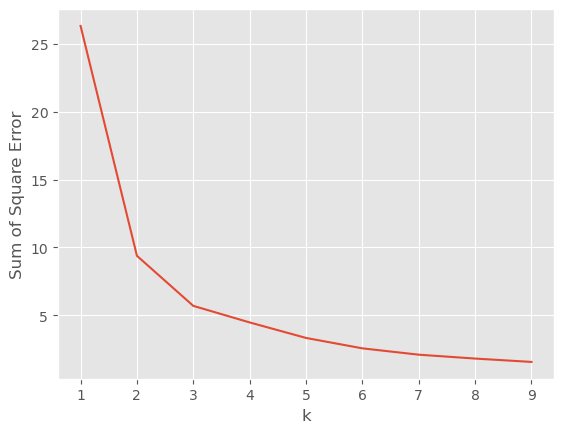

In [19]:
plt.xlabel("k")
plt.ylabel("Sum of Square Error")
plt.plot(k_range, sse)